<a href="https://colab.research.google.com/github/melchaorai/melchaorai/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การบ้านสัปดาห์ที่ 2
- ความเข้าใจเกี่ยวกับ Color space, Psuedo color processing, Color transformation


In [ ]:
#import required library
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
import math
from skimage import io
import cv2
import numpy as np
from skimage.util import img_as_ubyte

## แบบฝึกหัดที่ 2.1
**วัตถุประสงค์**
- เพื่อทดสอบความรู้ความเข้าใจในการแปลงภาพ gray-scale เป็นภาพสีโดยใช้เทคนิด intensity slicing and Pseudo-color processing

**คำถาม:**

2.1.1 ทำการ uncomment code ในหัวข้อที่ 2.1.1 แล้วรันโค๊ด สังเกตสีผลลัพธ์ที่ได้ พร้อมอธิบาย

2.1.2 ทำการ uncomment code เพิ่มในส่วนของหัวข้อที่ 2.1.2 แล้วรันโค๊ดอีกครั้ง สังเกตสีผลลัพธ์ที่ได้ พร้อมอธิบาย

**โจทย์:** ให้นักศึกษาทำการเขียนโปรแกรมจากโค๊ดตัวอย่างด้านล่างเพื่อเปลี่ยนภาพ gray scale เป็นภาพสีจำนวน 3 เฉดสีที่ไม่ใช่สีในโทน grayscale



In [ ]:
# การเปิดไฟล์ภาพผ่าน url
urls="https://github.com/jbinteam/010723305/blob/main/images/Castle_reflecting_by_Gustave_Le_Gray.jpg?raw=true"
image = io.imread(urls)

cv_img = img_as_ubyte(image) #แปลงข้อมูล unsigned byte เป็น image

cv_img = cv2.cvtColor(cv_img,cv2.COLOR_RGB2BGR)

processed_img=cv_img.copy() # copy ข้อมูลจากภาพ cv_img มาที่ processed_img
# processed_img=np.where(processed_img<100,[0,255,0],processed_img) # เปลี่ยนค่า intensity ของ pixel ในตำแหน่งที่มีค่าน้อยกว่า 100 เป็น [0,255,0] # 2.1.1
# processed_img=np.where(processed_img<150,[0,0,255],processed_img) # เปลี่ยนค่า intensity ของ pixel ในตำแหน่งที่มีค่าน้อยกว่า 150 เป็น [255,0,0] # 2.1.2

# cv2_imshow(processed_img) #uncomment เพื่อแสดงผลลัพธ์จากการ process ภาพ
cv2_imshow(cv_img) #uncomment เพื่อแสดงภาพต้นฉบับ

## แบบฝึกหัดที่ 2.2
**วัตถุประสงค์**
- การนำเทคนิคด้านสีของของ pixel ใน HSV space ไปใช้ในการตรวจจับสีที่ต้องการจากภาพที่กำหนด

**คำถาม:**

2.2.1 เพราะเหตุใดค่าที่กำหนดในโค๊ดบรรทัดนี้จึงต้องเป็นค่า 255 เป็นค่าอื่นได้หรือไม่

2.2.2 อธิบายสิ่งการทำงานของโค๊ดในบรรทัดนี้

**โจทย์:** ให้นักศึกษาทำการแก้ไขโค๊ดจากโปรแกรมตัวอย่างเพื่อทำการตรวจจับเฉพาะสีของดอกไม้ที่มีโทนสีชมพู


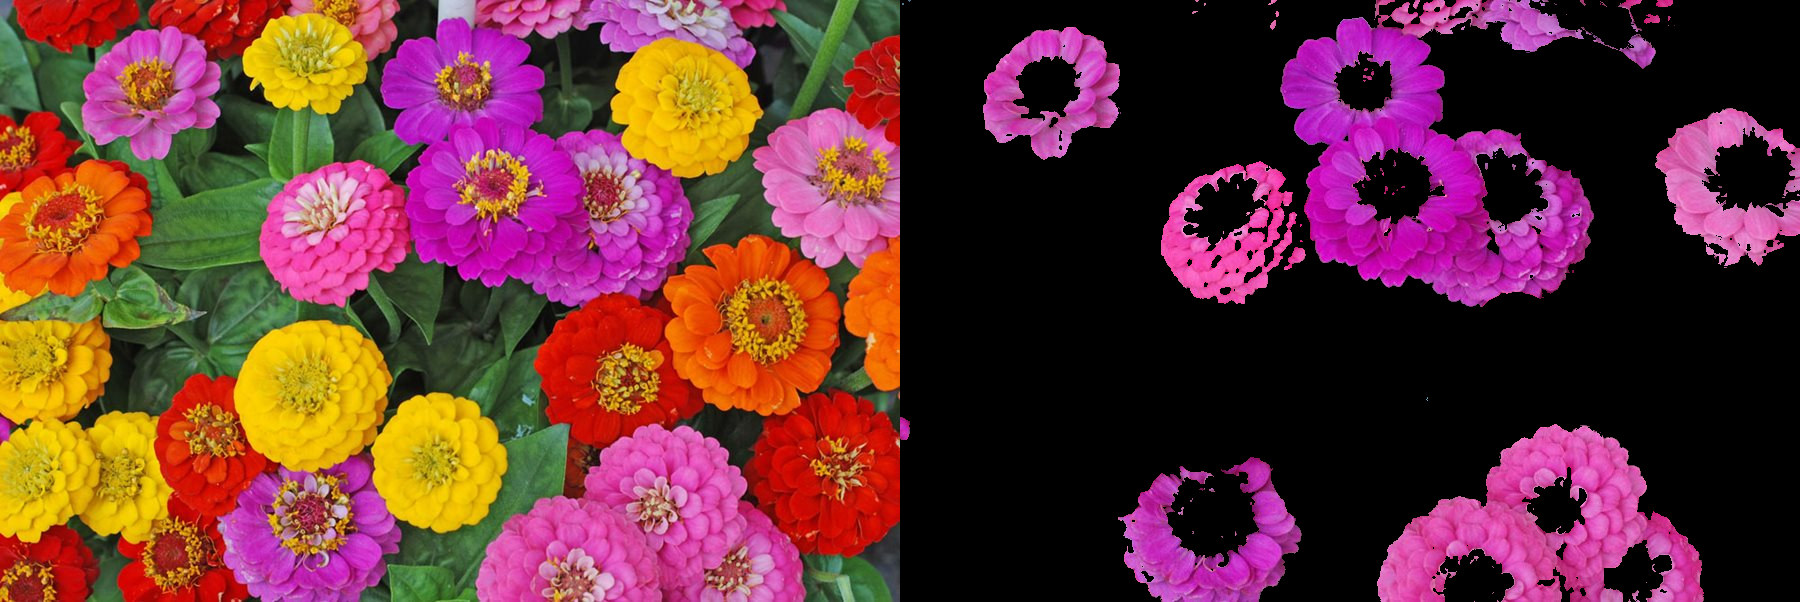

In [48]:
flower_urls="https://github.com/jbinteam/010723305/blob/main/images/flowers-mixed.jpg?raw=true"
flower_img = io.imread(flower_urls)

original_img = img_as_ubyte(flower_img)

flower_hsv = cv2.cvtColor(original_img,cv2.COLOR_RGB2HSV)

upper_range_yellow=np.array([165,255,255]) # ค่าสูงสุดของ h,s และ v ที่ต้องการตรวจจับ
lower_range_yellow=np.array([90,100,100]) # ค่าต่ำสุดของ h,s และ v ที่ต้องการตรวจจับ

mask = cv2.inRange(flower_hsv,lower_range_yellow,upper_range_yellow) #สร้าง mask จากช่วง hsv ที่กำหนด
mask_indices=np.where(mask==255) # 2.2.1
output_image = np.zeros(original_img.shape, dtype = "uint8")
output_image[mask_indices] = original_img[mask_indices] # 2.2.2


rgb_img=cv2.cvtColor(output_image,cv2.COLOR_RGB2BGR)
original_img=cv2.cvtColor(original_img,cv2.COLOR_RGB2BGR)

images=np.hstack((original_img,rgb_img))

cv2_imshow(images)
#cv2_imshow(mask)

## แบบฝึกหัดที่ 2.3
**วัตถุประสงค์**
- เพื่อศึกษาและทำความเข้าใจเกี่ยวกับการปรับแต่งค่าสีของภาพ


**โจทย์:**
จากโค๊ดตัวอย่างด้านล่าง จงเขียนฟังชันส์เพื่อประมวลผลภาพดังต่อไปนี้

2.3.1 เขียนฟังชันเพื่อลดโทนสีแดงของภาพลง 30%

2.3.2 เขียนฟังชันเพื่อลดโทนสีน้ำเงินของภาพลง 30%

2.3.3 เขียนฟังชันเพื่อลดความสว่างของภาพ (darken)

2.3.4 เขียน posterize ฟังชันเพื่อจัดการสีตาม channel ที่ต้องการ

**Hint: if pixel intensity > 128: pixel intensity = 255, else: pixel intensity =0**


In [ ]:
flower_urls="https://github.com/jbinteam/010723305/blob/main/images/flowers-mixed.jpg?raw=true"
flower_img = io.imread(flower_urls)

original_img = img_as_ubyte(flower_img)
original_img=cv2.cvtColor(original_img,cv2.COLOR_RGB2BGR)

toner=np.array([0,0,1.0]) #BGR

print("tonerShape:",toner.shape)
print("imageShape:",original_img.shape)
output=original_img*toner
images=np.hstack((original_img,output))
cv2_imshow(images)

In [ ]:
#2.3.1
def decreaseRed(img):
  processed_img=img.copy()
  #write your code here


  return processed_img

#2.3.2
def decreaseBlue(img):
  processed_img=img.copy()
  #write your code here


  return processed_img

#2.3.3
def darken(img):
  processed_img=img.copy()
  #write your code here


  return processed_img

#2.3.4
def posterizeColor(img,channel):
  processed_img=img.copy()
  #write your code here


  return processed_img